In [118]:
# 1.📦 Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (8, 6)

In [119]:
# 2.📂 Cargar el dataset de características
data_path = f"F:/orthesis_classification/data/features/emg_features_labeled.csv"
try:
    features = pd.read_csv(data_path)
except FileNotFoundError:
    print("Archivo no encontrado. Por favor, verifique la ruta de acceso.")
    exit()

### Principal Component Analysis (PCA)

In [120]:
X = features.select_dtypes(include=[np.number])
y = features["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=5)

components = pca.fit_transform(X_scaled)
labels = {
    str(i): f"PC {i+1} ({var:.2f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(components, labels=labels, dimensions=range(5), color=y, width=1000, height=800, title="Principal Component Analysis")

fig.update_traces(diagonal_visible=False)
fig.show()

In [121]:
fig = px.scatter(components, x=0, y=1, color=y, width=800, height=500, title="Prinicpal Component Analysis")
fig.show()

In [122]:
total_var = pca.explained_variance_ratio_.sum()
fig = px.scatter_3d(components, x=0, y=1, z=2, color=y, title=f'Total explained variance: {total_var:.2f}', 
                    labels={'0': 'PC1', '1': 'PC2', '2': 'PC3', '3': 'PC4', '4': 'PC5'}, width=800, height=600)
fig.show()

In [123]:
# Entrenamiento modelo PCA con escalado de datos
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=5))

X = features.select_dtypes(include=[np.number])
y = features["label"]

pca_pipe.fit(X)

pca_model = pca_pipe.named_steps['pca']
print(X)

               iem        mean         mav      mavs         rms          var  \
0     8.464214e+05  162.773354  162.773354  0.193906  164.399966   532.184121   
1     1.613424e+06  310.273928  310.273928  0.566256  313.774204  2184.340647   
2     1.726328e+06  331.986225  331.986225  0.581504  334.787110  1867.554914   
3     1.771687e+06  340.708989  340.708989  0.469496  343.231132  1724.994659   
4     1.444726e+06  277.831928  277.831928  0.357153  279.856952  1129.333549   
...            ...         ...         ...       ...         ...          ...   
1843  3.522290e+05   58.704834   58.704834  0.440003   73.443077  1947.627982   
1844  6.123270e+05  102.054492  102.054492  0.738301  142.257390  9822.045668   
1845  3.085218e+05   51.420306   51.420306  0.253839   53.998150   271.752269   
1846  2.786510e+05   46.441837   46.441837  0.386163   62.360067  1731.933766   
1847  1.201006e+05   20.016773   20.016773  0.093529   20.313555    11.969317   

            std   kurtosis 

In [124]:
pca_model_components = pd.DataFrame(data=pca_model.components_, 
                                     columns=X.columns,
                                     index=['PC'+str(i+1) for i in range(len(pca_model.components_))])

pca_model_components.index.name = "component"
pca_model_components.to_csv(f"F:/orthesis_classification/models/PCA/pca_model_components.csv", index=True)

pca_model_components

,iem,mean,mav,mavs,rms,var,std,kurtosis,skewness,max,...,range,wl,wamp,zc,myopulse,wamp_norm,ld,aac,dasdv,ssi
component,,,,,,,,,,,,,,,,,,,,,
PC1,0.260803,0.258566,0.258567,0.281428,0.292606,0.239593,0.255075,-0.018507,-0.007045,0.291232,...,0.291194,0.272068,0.009786,-0.000000e+00,0.021867,0.012461,0.207368,0.281428,0.264046,0.272572
PC2,-0.241578,-0.248375,-0.248374,0.186713,-0.163119,0.195438,0.234177,-0.364213,0.393472,0.136771,...,0.136969,0.204230,0.054881,0.000000e+00,0.338728,0.054767,-0.319142,0.186729,-0.004708,-0.193692
PC3,0.010731,0.019720,0.019717,-0.027276,-0.003224,-0.087087,-0.074995,0.035076,0.030248,-0.028650,...,-0.028931,-0.038312,0.685124,2.524355e-29,0.046958,0.685577,0.048609,-0.027204,0.176758,-0.006908
PC4,0.114238,0.128512,0.128477,-0.087585,0.061924,-0.231757,-0.165973,-0.199269,0.351963,-0.013394,...,-0.016314,-0.106654,-0.087591,-2.584939e-26,0.451614,-0.086530,0.205504,-0.087684,-0.018196,0.079340
PC5,-0.137675,-0.133234,-0.133276,0.091233,-0.077276,0.273045,0.133496,0.285250,-0.257713,0.036636,...,0.033211,0.080782,0.017319,-0.000000e+00,-0.268646,0.016203,-0.179801,0.091014,-0.003672,-0.075827


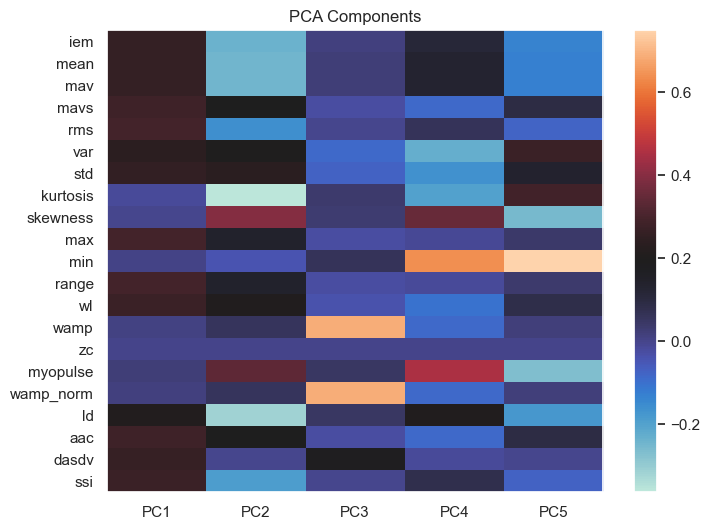

In [153]:
components = pca_model.components_

plt.imshow(components.T, cmap="icefire", aspect="auto")
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(pca_model.n_components_), (f'PC{i+1}' for i in range(pca_model.n_components_)))
plt.title("PCA Components")
plt.grid(False)
plt.colorbar()

plt.savefig("F:/orthesis_classification/reports/figures/pca_components.png")
plt.show()

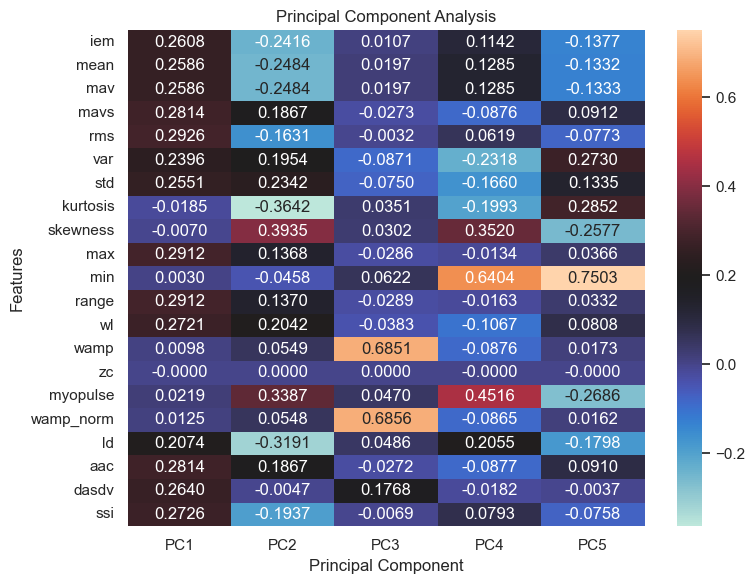

In [152]:
# Mejorar visualización de heatmap 
df_pca = pd.DataFrame(pca_model.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca_model.n_components_)])

sns.heatmap(df_pca.T, annot=True, fmt=".4f", cmap='icefire')
plt.title('Principal Component Analysis')
plt.xlabel('Principal Component')
plt.ylabel('Features')
plt.tight_layout()

plt.savefig("F:/orthesis_classification/reports/figures/pca_components_annot.png")
plt.show()

In [127]:
eigenvalues = pca_model.explained_variance_
print("Eigenvalues of each principal component:")
print(eigenvalues)

Eigenvalues of each principal component:
[10.03035774  4.71269621  2.0659344   1.06041017  0.9595677 ]


Porcentaje de varianza explicada por componente
[0.5012465  0.2355073  0.10324082 0.05299182 0.04795242]


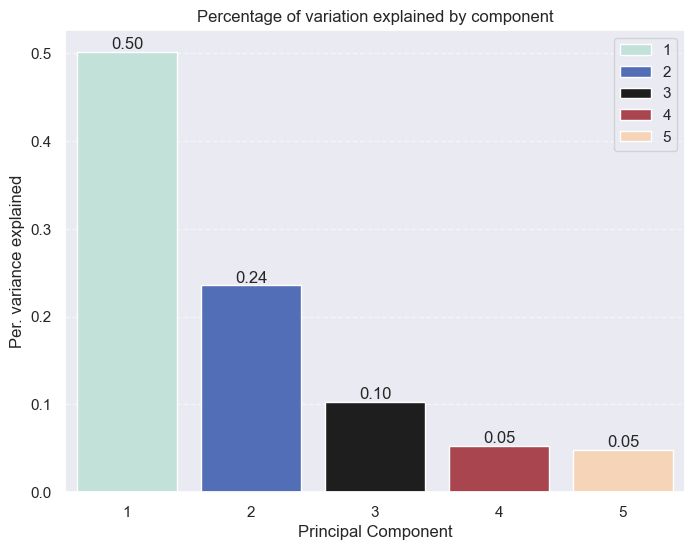

In [151]:
explained_var = pca_model.explained_variance_ratio_
print("Porcentaje de varianza explicada por componente")
print(explained_var)

ax = sns.barplot(x=np.arange(len(explained_var)) + 1, y=explained_var, hue=np.arange(len(explained_var)) + 1, palette="icefire")
for cont in ax.containers:
    plt.bar_label(cont, fmt='%.2f')
plt.xlabel("Principal Component"), plt.ylabel("Per. variance explained")
plt.title("Percentage of variation explained by component")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("F:/orthesis_classification/reports/figures/per_variance_explained.png")
plt.show()

Porcentaje de varianza explicada acumulada
[0.5012465  0.73675381 0.83999463 0.89298645 0.94093887]


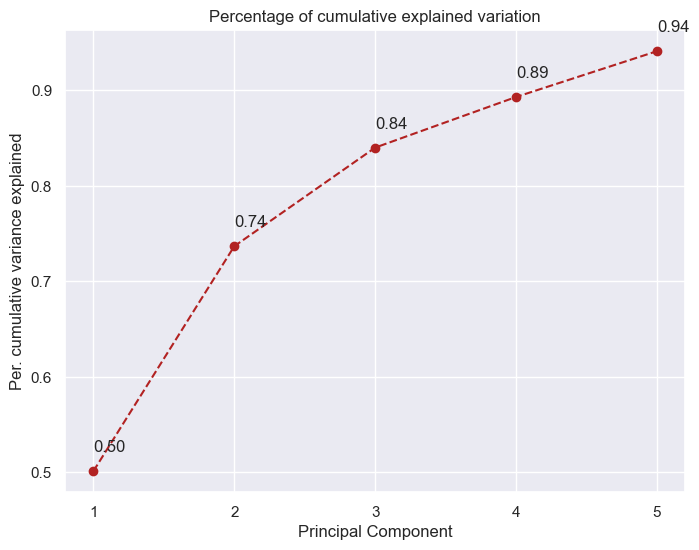

In [150]:
# Porcentaje de varianza explicada acumulada 
explained_var_acum = pca_model.explained_variance_ratio_.cumsum()
components = np.arange(len(explained_var_acum)) + 1

print("Porcentaje de varianza explicada acumulada")
print(explained_var_acum)

plt.plot(components, explained_var_acum, marker="o", linestyle='--', color='firebrick')
for i, val in enumerate(explained_var_acum):
    plt.text(components[i], val + 0.02, f'{val:.2f}')
    
plt.xlabel("Principal Component"), plt.ylabel("Per. cumulative variance explained")
plt.xticks(components)
plt.title("Percentage of cumulative explained variation")

plt.savefig("F:/orthesis_classification/reports/figures/per_var_explained_acum.png")
plt.show()

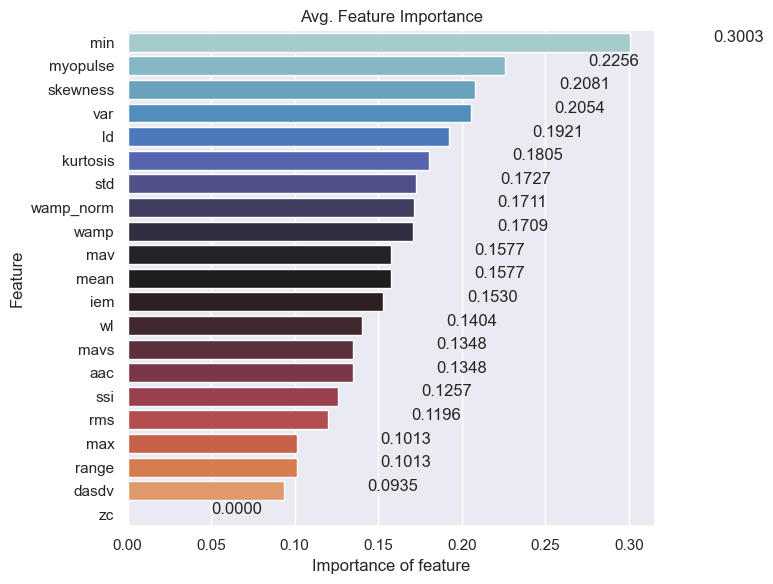

In [149]:
features_names = X.columns

feature_importance = np.mean(np.abs(pca_model.components_), axis=0)
sorted_index = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_index]
sorted_features = features_names[sorted_index]

ax = sns.barplot(x=sorted_importance, y=sorted_features, palette="icefire", hue=sorted_features)
for i, (value, name) in enumerate(zip(sorted_importance, sorted_features)):
    ax.text(value + 0.05, i, f'{value:.4f}')
    
plt.title("Avg. Feature Importance")
plt.xlabel("Importance of feature"), plt.ylabel("Feature")
plt.tight_layout()

plt.savefig("F:/orthesis_classification/reports/figures/avg_feature_importance.png")
plt.show()

De acuerdo con lo encontrado en el PCA, se puede decir que los primeros **tres componentes** explican el **84% de la variación total** en los datos. Asimismo, se puede observar que **características** tienen **mayor peso** en cada uno de los componentes, lo que sugiere que estas características son **más importantes para la clasificación**. 

De igual forma, se puede observar que la característica que posee **mayor peso** es **kurtosis**, seguida por el valor **mínimo** y el **myopulse**. Con esto, se puede concluir que estas características son **importantes para la clasificación**.

### Linear Discriminant Analysis (LDA)

In [131]:
X = features.select_dtypes(include=[np.number])
y = features["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=5)

components = lda.fit_transform(X_scaled, y)
labels = {
    str(i): f"LD {i+1} ({var:.2f}%)"
    for i, var in enumerate(lda.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(components, labels=labels, dimensions=range(5), color=y, width=1000, height=800, title="Linear Discriminant Analysis")

fig.update_traces(diagonal_visible=False)
fig.show()

In [132]:
fig = px.scatter(components, x=0, y=1, color=y, width=800, height=500, title="Linear Discriminant Analysis")
fig.show()

In [133]:
total_var = lda.explained_variance_ratio_.sum()
fig = px.scatter_3d(components, x=0, y=1, z=2, color=y, title=f'Total explained variance: {total_var:.2f}', 
                    labels={'0': 'LD1', '1': 'LD2', '2': 'LD3', '3': 'LD4', '4': 'LD5'}, width=800, height=600)
fig.show()

In [134]:
# Entrenamiento modelo LDA con escalado de datos
lda_pipe = make_pipeline(StandardScaler(), LDA(n_components=5))

X = features.select_dtypes(include=[np.number])
y = features["label"]

lda_pipe.fit(X, y)

lda_model = lda_pipe.named_steps['lineardiscriminantanalysis']
print(X)

               iem        mean         mav      mavs         rms          var  \
0     8.464214e+05  162.773354  162.773354  0.193906  164.399966   532.184121   
1     1.613424e+06  310.273928  310.273928  0.566256  313.774204  2184.340647   
2     1.726328e+06  331.986225  331.986225  0.581504  334.787110  1867.554914   
3     1.771687e+06  340.708989  340.708989  0.469496  343.231132  1724.994659   
4     1.444726e+06  277.831928  277.831928  0.357153  279.856952  1129.333549   
...            ...         ...         ...       ...         ...          ...   
1843  3.522290e+05   58.704834   58.704834  0.440003   73.443077  1947.627982   
1844  6.123270e+05  102.054492  102.054492  0.738301  142.257390  9822.045668   
1845  3.085218e+05   51.420306   51.420306  0.253839   53.998150   271.752269   
1846  2.786510e+05   46.441837   46.441837  0.386163   62.360067  1731.933766   
1847  1.201006e+05   20.016773   20.016773  0.093529   20.313555    11.969317   

            std   kurtosis 

In [135]:
lda_model_scalings = pd.DataFrame(data=lda_model.scalings_, 
                                  index = X.columns,
                                  columns=[f'LD{i+1}' for i in range(lda_model.scalings_.shape[1])])
                                  
lda_model_scalings.index.name = "feature"
lda_model_scalings.to_csv(f"F:/orthesis_classification/models/LDA/lda_model_scalings.csv", index=True)

lda_model_scalings

,LD1,LD2,LD3,LD4,LD5,LD6
feature,,,,,,
iem,-1.106207e+01,-7.726922e+00,7.204390e+00,6.845468e+00,3.874983e-01,7.389388e+00
mean,1.336774e+01,3.611146e+00,-2.605485e+01,1.288363e+01,-8.474489e+00,-2.299066e+01
mav,1.338118e+01,3.628672e+00,-2.604590e+01,1.287139e+01,-8.437018e+00,-2.291720e+01
mavs,6.745790e+01,9.303855e+01,5.821909e+01,-6.400923e+01,2.057869e+02,4.026567e+02
rms,-1.155096e+01,-9.491029e-01,5.009844e+01,-1.011818e+01,8.950497e+00,2.611920e+01
var,3.207228e+00,4.249681e-01,1.965538e-01,6.545314e-01,-1.619858e+00,1.593820e+00
std,-1.222787e+00,-1.008607e+00,-1.053354e+01,-4.795030e+00,1.666146e+00,-1.345557e+00
kurtosis,7.193986e-01,4.443756e-01,-1.151551e-01,1.121998e-01,-4.050242e-02,-5.939337e-01
skewness,-5.111686e-01,1.884969e+00,1.261488e+00,7.717038e-01,-4.894191e-01,-5.897474e-01


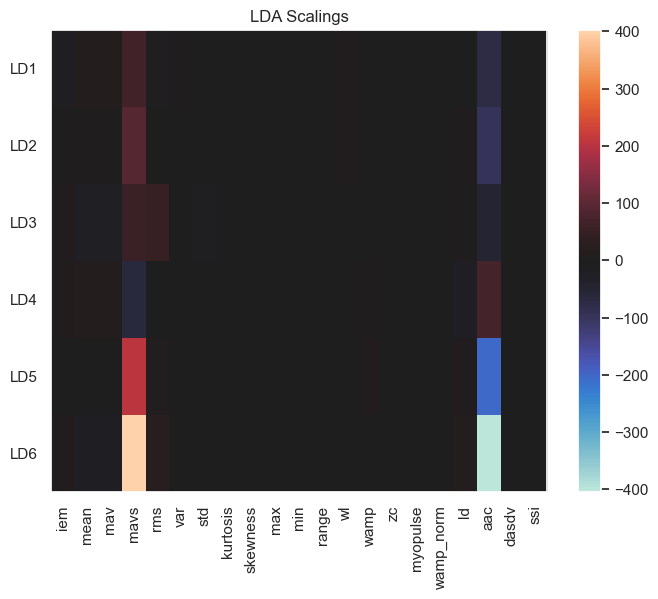

In [148]:
scalings = lda_model.scalings_

plt.imshow(scalings.T, cmap="icefire", aspect="auto")
plt.yticks(range(lda_model.scalings_.shape[1]), (f'LD{i+1}' for i in range(lda_model.scalings_.shape[1])))
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.title("LDA Scalings")
plt.grid(False)
plt.colorbar()

plt.savefig("F:/orthesis_classification/reports/figures/lda_scalings.png")
plt.show()

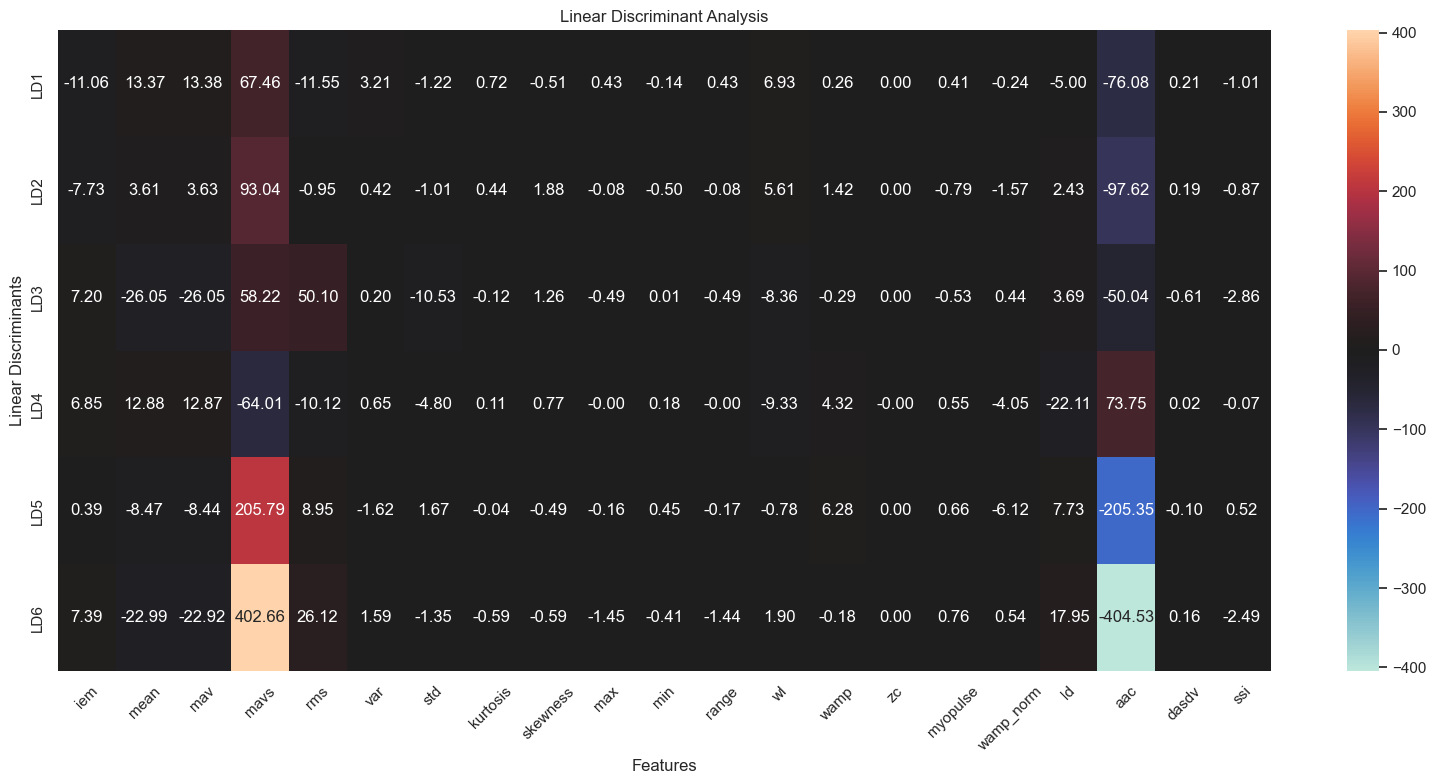

In [147]:
# Mejorar visualización de heatmap 
df_lda = pd.DataFrame(lda_model.scalings_, index=X.columns, columns=[f'LD{i+1}' for i in range(lda_model.scalings_.shape[1])])

plt.figure(figsize=(16, 8))
sns.heatmap(df_lda.T, annot=True, fmt=".2f", cmap='icefire')
plt.title('Linear Discriminant Analysis')
plt.ylabel('Linear Discriminants'), plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("F:/orthesis_classification/reports/figures/lda_scalings_annot.png")
plt.show()

Porcentaje de varianza explicada por componente
[0.6820863  0.12437368 0.08800103 0.05934613 0.02787757]


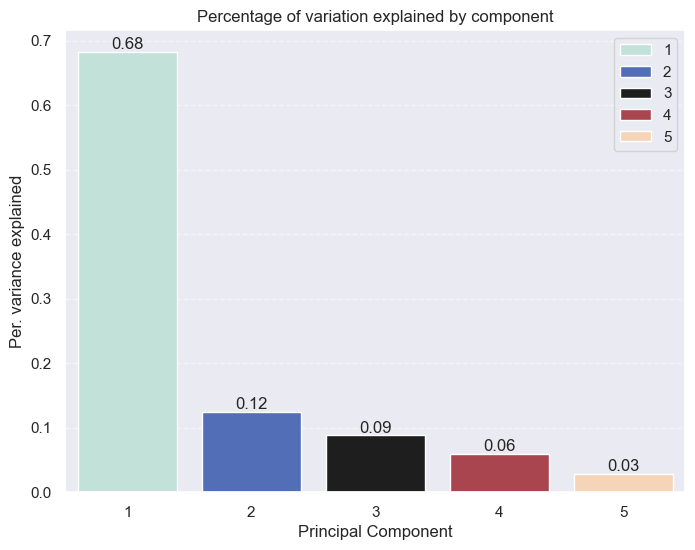

In [154]:

explained_var = lda_model.explained_variance_ratio_
print("Porcentaje de varianza explicada por componente")
print(explained_var)

ax = sns.barplot(x=np.arange(len(explained_var)) + 1, y=explained_var, hue=np.arange(len(explained_var)) + 1, palette="icefire")
for cont in ax.containers:
    plt.bar_label(cont, fmt='%.2f')
plt.xlabel("Principal Component"), plt.ylabel("Per. variance explained")
plt.title("Percentage of variation explained by component")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("F:/orthesis_classification/reports/figures/per_variance_explained_lda.png")
plt.show()

Porcentaje de varianza explicada acumulada
[0.6820863  0.80645998 0.89446101 0.95380714 0.9816847 ]


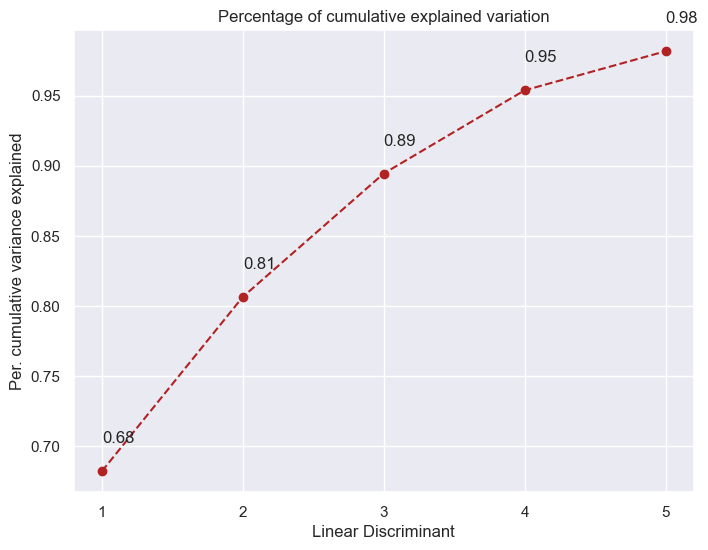

In [155]:
explained_var_acum = lda_model.explained_variance_ratio_.cumsum()
components = np.arange(len(explained_var_acum)) + 1

print("Porcentaje de varianza explicada acumulada")
print(explained_var_acum)

plt.plot(components, explained_var_acum, marker="o", linestyle='--', color='firebrick')
for i, val in enumerate(explained_var_acum):
    plt.text(components[i], val + 0.02, f'{val:.2f}')
    
plt.xlabel("Linear Discriminant"), plt.ylabel("Per. cumulative variance explained")
plt.xticks(components)
plt.title("Percentage of cumulative explained variation")

plt.savefig("F:/orthesis_classification/reports/figures/per_variance_explained_acum_lda.png")
plt.show()

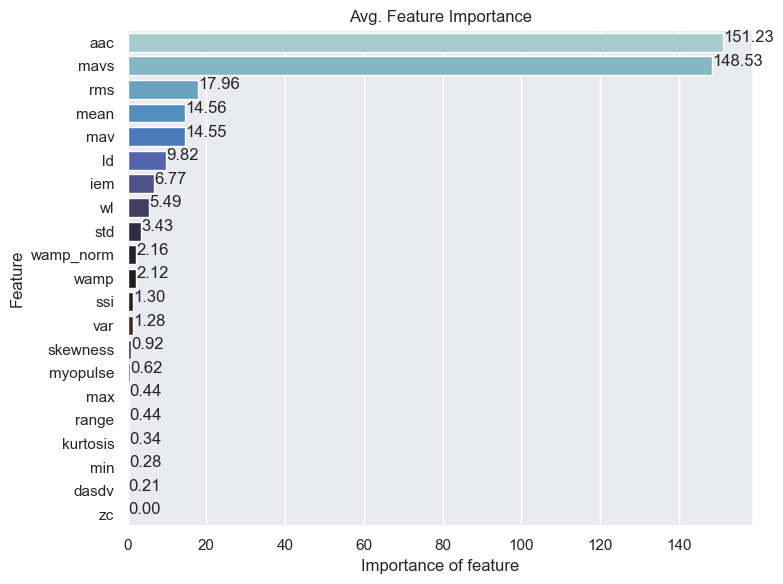

In [156]:
features_names = X.columns

feature_importance = np.mean(np.abs(lda_model.scalings_), axis=1)
sorted_index = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_index]
sorted_features = features_names[sorted_index]

ax = sns.barplot(x=sorted_importance, y=sorted_features, palette="icefire", hue=sorted_features)
for i, (value, name) in enumerate(zip(sorted_importance, sorted_features)):
    ax.text(value + 0.05, i, f'{value:.2f}')
    
plt.title("Avg. Feature Importance")
plt.xlabel("Importance of feature"), plt.ylabel("Feature")
plt.tight_layout()

plt.savefig("F:/orthesis_classification/reports/figures/avg_feature_importance_lda.png")
plt.show()

De acuerdo con lo encontrado en el LDA, se puede decir que los primeros **tres componentes** explican el **89% de la variación total** en los datos. Asimismo, se puede observar que **características** tienen **mayor peso** en cada uno de los componentes, lo que sugiere que estas características son **más importantes para la clasificación**. 

De igual forma, se puede observar que la característica que posee **mayor peso** es **aac**, seguida por el **mean average value** y **rms**. Con esto, se puede concluir que estas características son **importantes para la clasificación**.